#### TfidfVectorizer and CountVectorizer both are the methods of converting text data into vectors.

In CountVectorizer the number of times a word appears in the document are being counted. disadvantage is it's ignores some words which are present in a less number in the document. And combination of words dosen't have any existance. 

##### Let's take an example, 
if a 'not' is present in front of any positive word it's make the word negative. (I am not happy)


TfidfVectorizer considers overall document weightage(weights the word counts by a measure of how often they appear in the documents) of a word and morw over, It helps us in dealing with most frequent words. Using it we can penalize them.


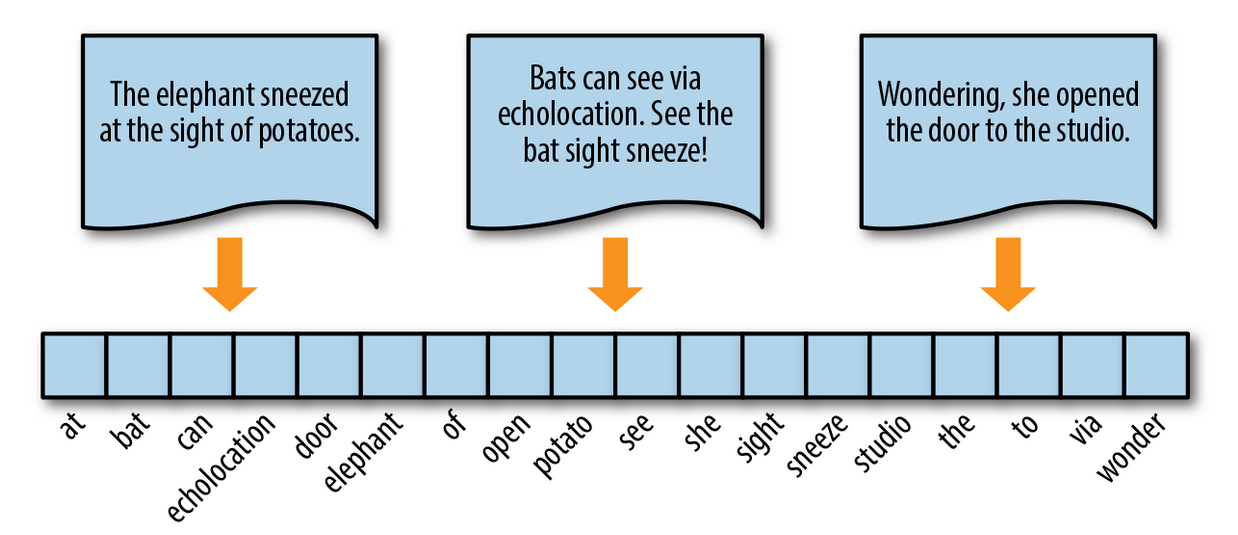


source : https://www.oreilly.com/library/view/applied-text-analysis/9781491963036/ch04.html

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
sad = pd.read_csv('/kaggle/input/emotion/Emotion(sad).csv')
happy= pd.read_csv('/kaggle/input/emotion/Emotion(happy).csv')
angry=pd.read_csv('/kaggle/input/emotion/Emotion(angry).csv')

In [ ]:
sad.shape

In [ ]:
happy.shape

In [ ]:
angry.shape

In [ ]:
sad.head()

In [ ]:
sad = sad.drop_duplicates(subset='content', keep="first")

In [ ]:
happy = happy.drop_duplicates(subset='content', keep="first")

In [ ]:
angry = angry.drop_duplicates(subset='content', keep="first")

In [ ]:
frames = [sad, happy, angry]

df = pd.concat(frames)

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df = df.drop_duplicates(subset='content', keep="first")

In [ ]:
df.shape

In [ ]:
df['sentiment'].value_counts()

## Replacing categorical values as :
     `happy ----> 1`
        
     `angry ----> 0`
        
     `sad   ----> 2`

In [ ]:
df['sentiment'].replace({'happy':1,'angry':0,'sad':2},inplace=True)

In [ ]:
df['sentiment'].value_counts()

# Following basic steps are required for nlp :

## 1.Cleaning html tag
## 2.Converting to lower 
## 3.Remove special characters
## 4.Remove stop words
## 5.Perform stemming


In [ ]:
## cleaning html tag

import re
def clean_html(text):
    
    clean = re.compile('<.*?>')
    return re.sub(clean, '',text)
    
df['content']=df['content'].apply(clean_html)

In [ ]:
## converting to lower 

def convert_lower(text):
    return text.lower()

df['content']=df['content'].apply(convert_lower)



In [ ]:
def remove_special(text):
        x=''
        for i in text:
            if i.isalnum():
                x=x+i
            else:
                x=x+' '
        return x

df['content']=df['content'].apply(remove_special)



In [ ]:
import nltk
from nltk.corpus import stopwords

def remove_stopwords(text):
    x=[]
    for i in text.split():
        
        if i not in stopwords.words('english'):
            x.append(i)
    y=x[:]
    x.clear()
    return y
df['content']=df['content'].apply(remove_stopwords)

In [ ]:
def join_back(list_input):
    return " ".join(list_input)
    

df['content']=df['content'].apply(join_back)



In [ ]:
import nltk

from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
y=[]

def stem_words(text):
    for i in text:
        y.append(ps.stem(i))
    z=y[:]
    y.clear()
    return z
df['content']=df['content'].apply(stem_words)


In [ ]:
def joinback2(list_input):
    return "".join(list_input)
    


df['content']=df['content'].apply(joinback2)

In [ ]:
df

In [ ]:
X=df['content']

In [ ]:
X.shape

In [ ]:
y=df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3) 

In [ ]:
X_test.shape

# 1.Using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)

In [ ]:
X_train = cv.fit_transform(X_train).toarray()
X_test=cv.transform(X_test).toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
clf1=GaussianNB()
clf2=MultinomialNB()
clf3=BernoulliNB()

In [ ]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)

In [ ]:
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)
y_pred3=clf3.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print("Gaussian",accuracy_score(y_test,y_pred1))
print("Multinomial",accuracy_score(y_test,y_pred2))
print("Bernaulli",accuracy_score(y_test,y_pred3))

# Testing

In [ ]:
test="i am sad & depressed too"

In [ ]:
test = np.array([test])
test = cv.transform(test)

In [ ]:
clf2.predict(test)

In [ ]:
X1=df['content']
y=df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X1,y,test_size=0.3) 

# 2.Usiing TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(min_df= 1, max_features=1500, strip_accents='unicode',analyzer='word',ngram_range=(1,3),stop_words='english')

In [ ]:
X_train = tv.fit_transform(X_train).toarray()
X_test = tv.transform(X_test).toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
clf1=GaussianNB()
clf2=MultinomialNB()
clf3=BernoulliNB()

In [ ]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)
y_pred3=clf3.predict(X_test)

In [ ]:
print("Gaussian",accuracy_score(y_test,y_pred1))
print("Multinomial",accuracy_score(y_test,y_pred2))
print("Bernaulli",accuracy_score(y_test,y_pred3))

In [ ]:
test="just go to jail"

In [ ]:
test = np.array([angry['content'][0]])
test = tv.transform(test)

In [ ]:
clf2.predict(test)